In [12]:
from pathlib import Path
import pandas as pd

paths = Path("jsonl/tf_idf_output").glob("*.json")
dfs = []
for p in paths:
    data = pd.read_json(p, lines=True)
    dfs.append(data)
tfidf_output = pd.concat(dfs, ignore_index=True)

In [13]:
tfidf_output.shape

(536599, 3)

In [97]:
tfidf_output.head(5)

,DOI,vocabulary,tf_idf_value
0,10.1016/j.bios.2016.01.008,[wang],0.752577
1,10.3934/jimo.2016.12.1227,[qi],0.809040
2,10.1007/s10909-015-1423-6,[phys],0.777714
3,10.1134/s0021364015200072,[phys],0.762055
4,10.1016/j.wavemoti.2015.12.005,[mitri],0.777482


In [63]:
# converting weird '[vocab]' to list. 
# I'd like a better way
def convert_array(row):
    vocab = row.iloc[1]
    tfidf = row.iloc[2]
    x = list(vocab)
    x.pop(0)
    x.pop(len(x)-1)
    return [row.iloc[0], ["".join(x)], tfidf]
    
processed_tfidf = tfidf_output.apply(convert_array, axis=1)

In [119]:
import pandas as pd
# type(processed_tfidf) = Series
cols = tfidf_output.columns.tolist()
processed_df = pd.DataFrame(processed_tfidf.to_list(), columns=cols)
processed_df

,DOI,vocabulary,tf_idf_value
0,10.1016/j.bios.2016.01.008,[wang],0.752577
1,10.3934/jimo.2016.12.1227,[qi],0.809040
2,10.1007/s10909-015-1423-6,[phys],0.777714
3,10.1134/s0021364015200072,[phys],0.762055
4,10.1016/j.wavemoti.2015.12.005,[mitri],0.777482
...,...,...,...
536594,10.1016/j.carbpol.2014.09.013,[ibrahim],0.981980
536595,10.1017/s1537592714001601,[alec],0.783523
536596,10.1108/s0190-1281_2014_0000034007,[lesorogol],0.768350
536597,10.3280/sr2014-103002,[burgess],0.761387


In [120]:
processed_df = processed_df.sort_values('tf_idf_value', ascending=False)

In [121]:
processed_df

,DOI,vocabulary,tf_idf_value
429934,10.1002/cca.680,[moraes],1.00
429921,10.1002/cca.582,[pienaar],1.00
80386,10.1002/cca.1981,[shen],1.00
240964,10.1002/cca.838,[poropat],1.00
80388,10.1002/cca.1987,[parreira],1.00
...,...,...,...
510004,10.1108/ijicc-02-2013-0005,[adamatzky],0.75
101237,10.1080/15376520490434476,[gupta],0.75
423484,10.3389/fchem.2020.00094,[wang],0.75
308871,10.1017/s1751731116000938,[philippe],0.75


In [154]:
import pandas as pd
bins = [0,0.76, 0.85, 0.95, 1.00]
labels = ["0.75","0.76-0.85","0.85-0.95","> 0.95"]
processed_df['categorized'] = pd.cut(processed_df['tf_idf_value'], bins=bins, labels=labels)
processed_df['rounded_value'] = processed_df.tf_idf_value.apply(lambda x: round(x,2))
processed_df

,DOI,vocabulary,tf_idf_value,categorized,rounded_value
429934,10.1002/cca.680,[moraes],1.00,> 0.95,1.00
429921,10.1002/cca.582,[pienaar],1.00,> 0.95,1.00
80386,10.1002/cca.1981,[shen],1.00,> 0.95,1.00
240964,10.1002/cca.838,[poropat],1.00,> 0.95,1.00
80388,10.1002/cca.1987,[parreira],1.00,> 0.95,1.00
...,...,...,...,...,...
510004,10.1108/ijicc-02-2013-0005,[adamatzky],0.75,0.75,0.75
101237,10.1080/15376520490434476,[gupta],0.75,0.75,0.75
423484,10.3389/fchem.2020.00094,[wang],0.75,0.75,0.75
308871,10.1017/s1751731116000938,[philippe],0.75,0.75,0.75


In [148]:
processed_df[processed_df.tf_idf_value == 1]

,DOI,vocabulary,tf_idf_value,categorized
429934,10.1002/cca.680,[moraes],1.0,> 0.95
429921,10.1002/cca.582,[pienaar],1.0,> 0.95
80386,10.1002/cca.1981,[shen],1.0,> 0.95
240964,10.1002/cca.838,[poropat],1.0,> 0.95
80388,10.1002/cca.1987,[parreira],1.0,> 0.95
...,...,...,...,...
506969,10.1002/cca.3597,[ota],1.0,> 0.95
260157,10.1016/s0928-2017(07)80004-1,[euler],1.0,> 0.95
155348,10.1002/cca.4014,[filippini],1.0,> 0.95
527436,10.1002/cca.3937,[crocker],1.0,> 0.95


In [125]:
categorized = pd.DataFrame(processed_df.categorized.value_counts())


In [126]:
categorized

,count
categorized,
0.76-0.85,320310
0.85-0.95,136350
0.75,58630
> 0.95,21309


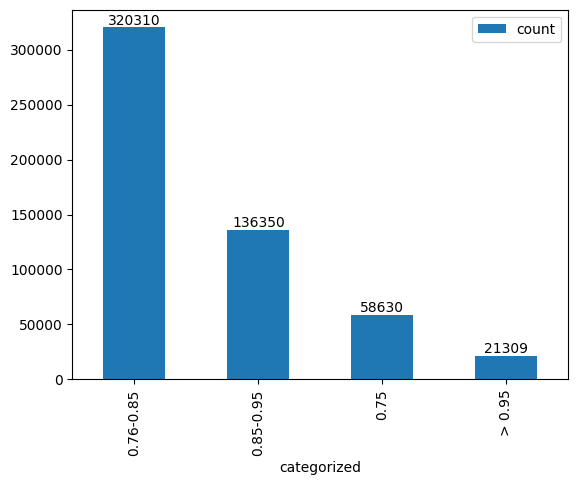

In [127]:
ax = categorized.plot.bar()
for container in ax.containers:
    ax.bar_label(container)

In [129]:
max_values_df = processed_df[processed_df.categorized == "> 0.95"]
max_values_df

,DOI,vocabulary,tf_idf_value,categorized
429934,10.1002/cca.680,[moraes],1.00,> 0.95
429921,10.1002/cca.582,[pienaar],1.00,> 0.95
80386,10.1002/cca.1981,[shen],1.00,> 0.95
240964,10.1002/cca.838,[poropat],1.00,> 0.95
80388,10.1002/cca.1987,[parreira],1.00,> 0.95
...,...,...,...,...
164270,10.1016/j.jmatprotec.2004.07.110,[gronostajski],0.95,> 0.95
425353,10.1177/21582440231196416,[kim],0.95,> 0.95
387701,10.1080/14779757.2003.9688301,[schmid],0.95,> 0.95
406590,10.1016/0146-3535(78)90003-5,[brice],0.95,> 0.95


In [131]:
max_sample = max_values_df.sample(n=3000, weights='tf_idf_value', random_state=1, ignore_index=False)
max_sample.sort_values('tf_idf_value', ascending=False)


,DOI,vocabulary,tf_idf_value,categorized
232781,10.1002/cca.2152,[chin],1.000000,> 0.95
173357,10.1002/cca.2071,[rankin],1.000000,> 0.95
294805,10.1002/cca.3314,[craig],1.000000,> 0.95
278235,10.1016/s0003-9365(83)80033-5,[kaul],1.000000,> 0.95
447063,10.1002/cca.1328,[anderson],1.000000,> 0.95
...,...,...,...,...
157881,10.1088/1674-1137/ac8c21,[wang],0.950004,> 0.95
93121,10.1017/s1477201904001518,[_____],0.950004,> 0.95
387701,10.1080/14779757.2003.9688301,[schmid],0.950000,> 0.95
131837,10.1016/j.molliq.2017.02.022,[hayat],0.950000,> 0.95


In [153]:
s[(s["tf_idf_value"] >= 0.95) & (s["tf_idf_value"] < 1)]

,DOI,vocabulary,tf_idf_value,categorized
347277,10.1525/rac.1998.8.2.03a00040,[dyer],0.951330,> 0.95
203511,10.1016/s0140-6736(47)91407-4,[menkin],0.991051,> 0.95
11245,10.13109/9783666535468.25,[vgl],0.986134,> 0.95
78140,10.1177/0725513614559937,[heller],0.979071,> 0.95
144930,10.1639/0007-2745-112.2.257,[schofield],0.981361,> 0.95
...,...,...,...,...
53786,10.1017/s0361233300005081,[people],0.969209,> 0.95
417192,10.1007/978-3-8350-9552-6_4,[vgl],0.963352,> 0.95
303198,10.1016/s0167-8442(01)00080-5,[sih],0.960277,> 0.95
376542,10.1016/s1542-0124(12)70212-4,[sjögren],0.998268,> 0.95


In [156]:
s = processed_df.groupby("rounded_value").sample(n=500, random_state=1)

In [157]:
s.sort_values('tf_idf_value', ascending=False)

,DOI,vocabulary,tf_idf_value,categorized,rounded_value
429950,10.1002/cca.526,[gharaibeh],1.00,> 0.95,1.00
18476,10.1002/cca.466,[komossa],1.00,> 0.95,1.00
363345,10.1002/cca.2800,[wieland],1.00,> 0.95,1.00
348155,10.1002/cca.1341,[prabhakar],1.00,> 0.95,1.00
391013,10.1002/cca.4135,[tosello],1.00,> 0.95,1.00
...,...,...,...,...,...
113982,10.1097/00002030-200201250-00007,[delwart],0.75,0.75,0.75
181386,10.1016/j.foodres.2011.01.032,[latocha],0.75,0.75,0.75
77769,10.1039/c3ra40653a,[zahn],0.75,0.75,0.75
84287,10.1016/j.jfranklin.2022.01.021,[wang],0.75,0.75,0.75


In [158]:
s[s.tf_idf_value == 1]

,DOI,vocabulary,tf_idf_value,categorized,rounded_value
325640,10.1002/cca.2548,[walsh],1.0,> 0.95,1.0
427080,10.1002/cca.2458,[gharaibeh],1.0,> 0.95,1.0
283609,10.1002/cca.2299,[ruospo],1.0,> 0.95,1.0
383493,10.1107/s1600536809049976,[liu],1.0,> 0.95,1.0
267856,10.1002/cca.981,[wong],1.0,> 0.95,1.0
...,...,...,...,...,...
383495,10.1107/s1600536809049964,[zhong],1.0,> 0.95,1.0
243581,10.1108/case.iima.2020.000048,[yamunaexpresswayauthority],1.0,> 0.95,1.0
216244,10.1080/14634988.2013.763011,[regier],1.0,> 0.95,1.0
195646,10.1002/0471667196.ess0641,[feller],1.0,> 0.95,1.0
